In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'training_set'
data_test_path = 'testing_set'
data_val_path = 'validation_set'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 107 files belonging to 4 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Mild vascular wound',
 'Moderate vascular wound',
 'Not a vascular wound',
 'Severe vascular wound']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 43 files belonging to 4 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 51 files belonging to 4 classes.


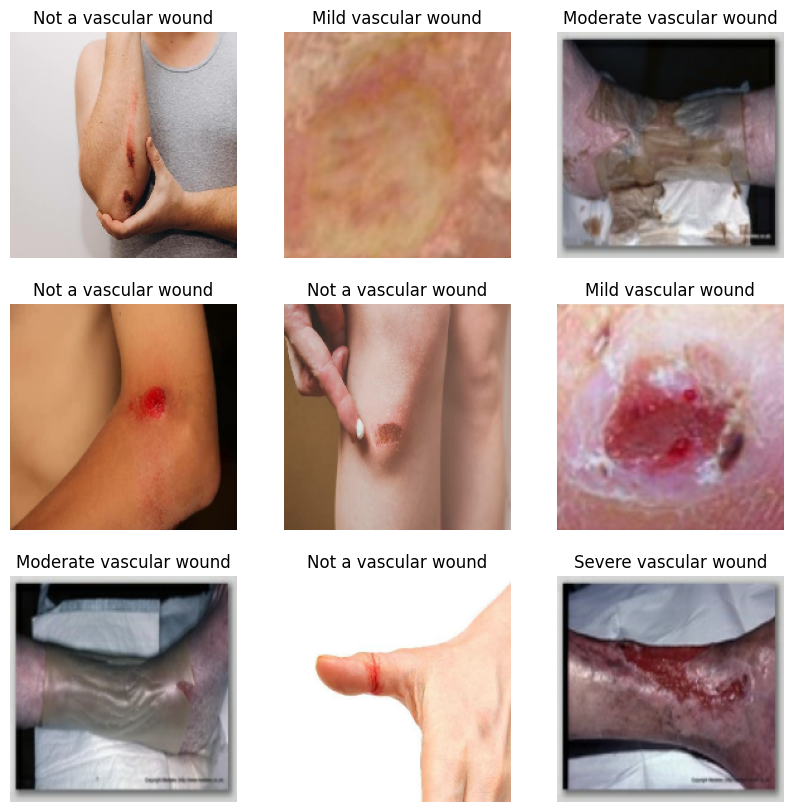

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size= 500
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.2617 - loss: 5.6736 - val_accuracy: 0.2326 - val_loss: 2.4423
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.3925 - loss: 1.6244 - val_accuracy: 0.4186 - val_loss: 1.3106
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4112 - loss: 1.1672 - val_accuracy: 0.4651 - val_loss: 1.1513
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6075 - loss: 0.9592 - val_accuracy: 0.3953 - val_loss: 1.2256
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.5981 - loss: 0.9743 - val_accuracy: 0.4419 - val_loss: 1.0421
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.7103 - loss: 0.7249 - val_accuracy: 0.4884 - val_loss: 1.0632
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.7757 - loss: 0.6319 - val_accuracy: 0.5581 - val_loss: 1.0411
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.7477 - loss: 0.5483 - val_accuracy: 0.5116 - v

Text(0.5, 1.0, 'Loss')

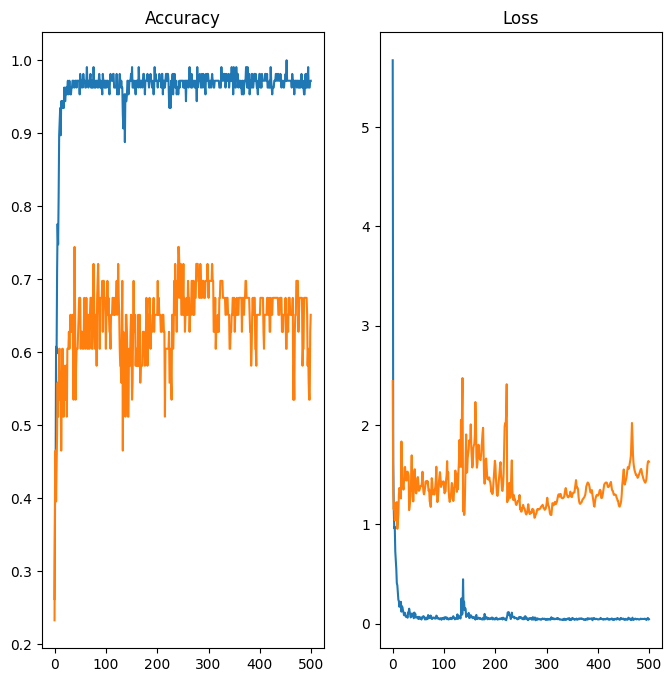

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'training_set/Mild vascular wound/สำเนาของ IMG_1812.PNG'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Wound in image is {} with an accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Wound in image is Mild vascular wound with an accuracy of 99.95


In [20]:
model.save('VeinGuard.keras')